In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
CTG = pd.ExcelFile('/home/zak/Documents/Uni/Y3/Machine Learning/Project/ML-Assignment1/CTG.xls')
Data = pd.read_excel(CTG, 'Data')
rawData = pd.read_excel(CTG, 'Raw Data')

In [3]:
rawData

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DataSet Information
2126 fetal cardiotocograms (CTGs) were processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

### Attribute Information
<li>FileName: of CTG examination
<li>Date: of the examination
<li>b: start instant
<li>e: end instant
<li>LBE: baseline value (medical expert)
<li>LB: baseline value
<li>AC: accelerations
<li>FM: foetal movement
<li>UC: uterine contractions
<li>ASTV: percentage of time with abnormal short term variability
<li>mSTV: mean value of short term variability
<li>ALTV: percentage of time with abnormal long term variability
<li>mLTV: mean value of long term variability
<li>DL: light decelerations
<li>DS: severe decelerations
<li>DP: prolongued decelerations
<li>DR: repetitive decelerations
<li>Width: histogram width
<li>Min: low freq. of the histogram
<li>Max: high freq. of the histogram
<li>Nmax: number of histogram peaks
<li>Nzeros: number of histogram zeros
<li>Mode: histogram mode
<li>Mean: histogram mean
<li>Median: histogram median
<li>Variance: histogram variance
<li>Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
<li>A: calm sleep
<li>B: REM sleep
<li>C: calm vigilance
<li>D: active vigilance
<li>SH: shift pattern (A or Susp with shifts)
<li>AD: accelerative/decelerative pattern (stress situation)
<li>DE: decelerative pattern (vagal stimulation)
<li>LD: largely decelerative pattern
<li>FS: flat-sinusoidal pattern (pathological state)
<li>SUSP: suspect pattern
<li>CLASS: Class code (1 to 10) for classes A to SUSP
<li>NSP: Normal=1; Suspect=2; Pathologic=3


In [4]:
rawData.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [5]:
rawData.dropna(inplace=True)

In [6]:
rawData.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [7]:
rawData.shape

(2126, 40)

In [8]:
rawData = rawData.drop(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'E'], axis=1)

## Dropped the following Columns
<li>FileName: of CTG examination <b>Not Relevent to the data</b>
<li>Date: of the examination <b>Not Relevent to the data</b>
<li>b: start instant <b>Not Relevent to the data</b>
<li>e: end instant <b>Not Relevent to the data</b>
<li>LBE: baseline value (medical expert) <b>Already in the Data with the name LB</b>
<li>E: <b>not a known attribiute</b>

## Using IQR Method

In [9]:
Q1 = rawData.quantile(0.25)
Q3 = rawData.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

LB          14.0
AC           4.0
FM           2.0
UC           4.0
ASTV        29.0
MSTV         1.0
ALTV        11.0
MLTV         6.2
DL           3.0
DS           0.0
DP           0.0
DR           0.0
Width       63.0
Min         53.0
Max         22.0
Nmax         4.0
Nzeros       0.0
Mode        19.0
Mean        20.0
Median      19.0
Variance    22.0
Tendency     1.0
A            0.0
B            1.0
C            0.0
D            0.0
AD           0.0
DE           0.0
LD           0.0
FS           0.0
SUSP         0.0
CLASS        5.0
NSP          0.0
dtype: float64


### Dealing with outliers

In [10]:
df_out = rawData[~((rawData <(Q1 - 1.5 * IQR)) | (rawData > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
print(df_out.shape)

(357, 33)


In [12]:
print(df_out)

         LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    B    C  \
5     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  1.0  0.0   
50    158.0  6.0  0.0  9.0  27.0   1.7   0.0  14.9  1.0  0.0  ...  1.0  0.0   
51    158.0  4.0  0.0  6.0  29.0   1.3   0.0  12.8  0.0  0.0  ...  1.0  0.0   
60    144.0  5.0  0.0  4.0  33.0   1.1   0.0   6.2  0.0  0.0  ...  1.0  0.0   
61    146.0  4.0  0.0  4.0  39.0   0.9  18.0   5.2  0.0  0.0  ...  1.0  0.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   
2077  130.0  6.0  1.0  1.0  72.0   0.9   9.0   4.8  0.0  0.0  ...  1.0  0.0   
2078  130.0  6.0  1.0  1.0  72.0   0.9   8.0   4.4  0.0  0.0  ...  1.0  0.0   
2079  130.0  5.0  0.0  1.0  73.0   0.6   9.0   5.0  0.0  0.0  ...  1.0  0.0   
2080  130.0  3.0  0.0  1.0  75.0   0.6  10.0   5.4  0.0  0.0  ...  1.0  0.0   
2081  130.0  3.0  2.0  1.0  74.0   1.3   8.0   5.0  0.0  0.0  ...  1.0  0.0   

        D   AD   DE   LD   FS  SUSP  CLASS  NSP  
5

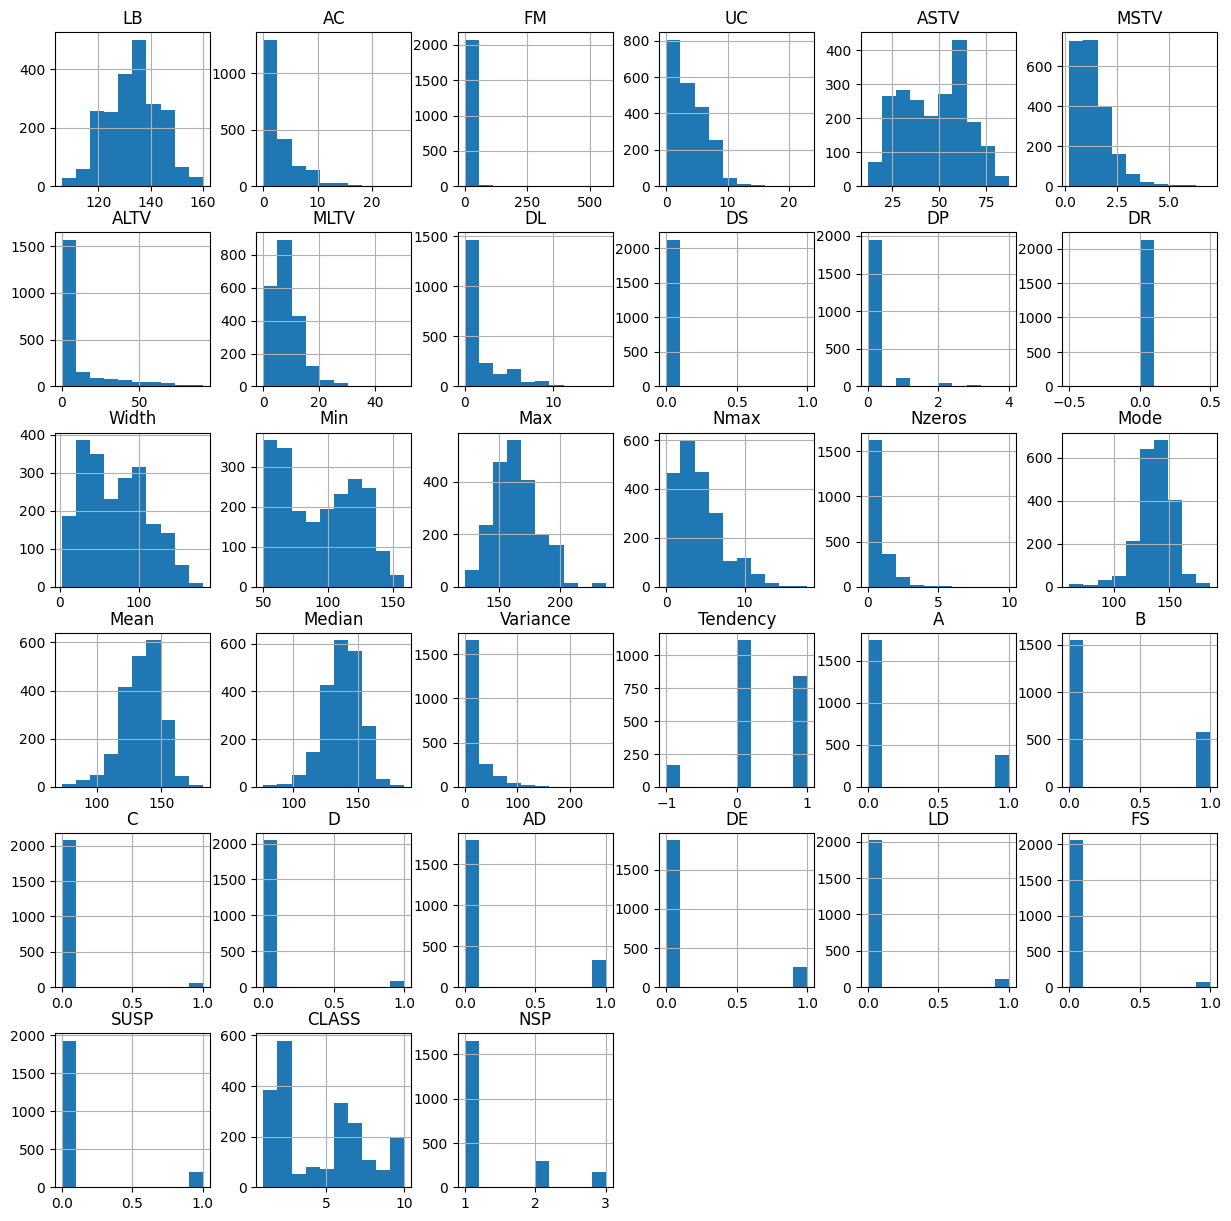

In [13]:
rawData.hist(figsize=(15, 15))
plt.show()

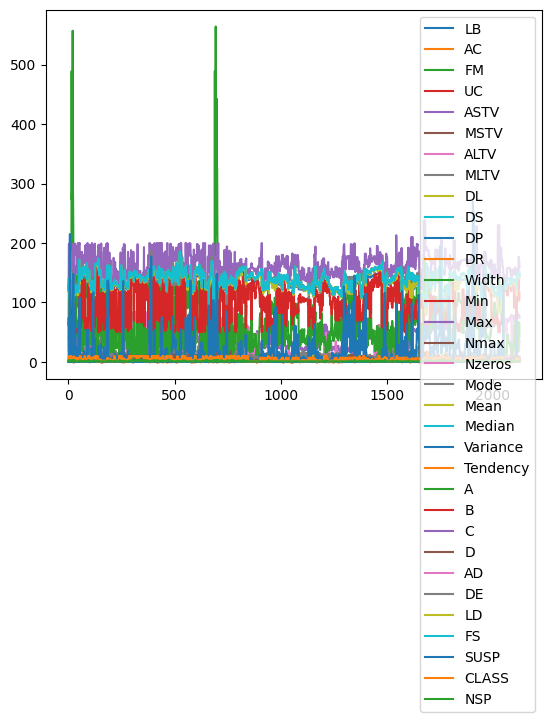

In [14]:
rawData.plot()
plt.show()

<b> It may seem like the FM has a lot of outliers, but the foetal movement is either at 0 or another number with respect to the intensity (number may vary) </b>

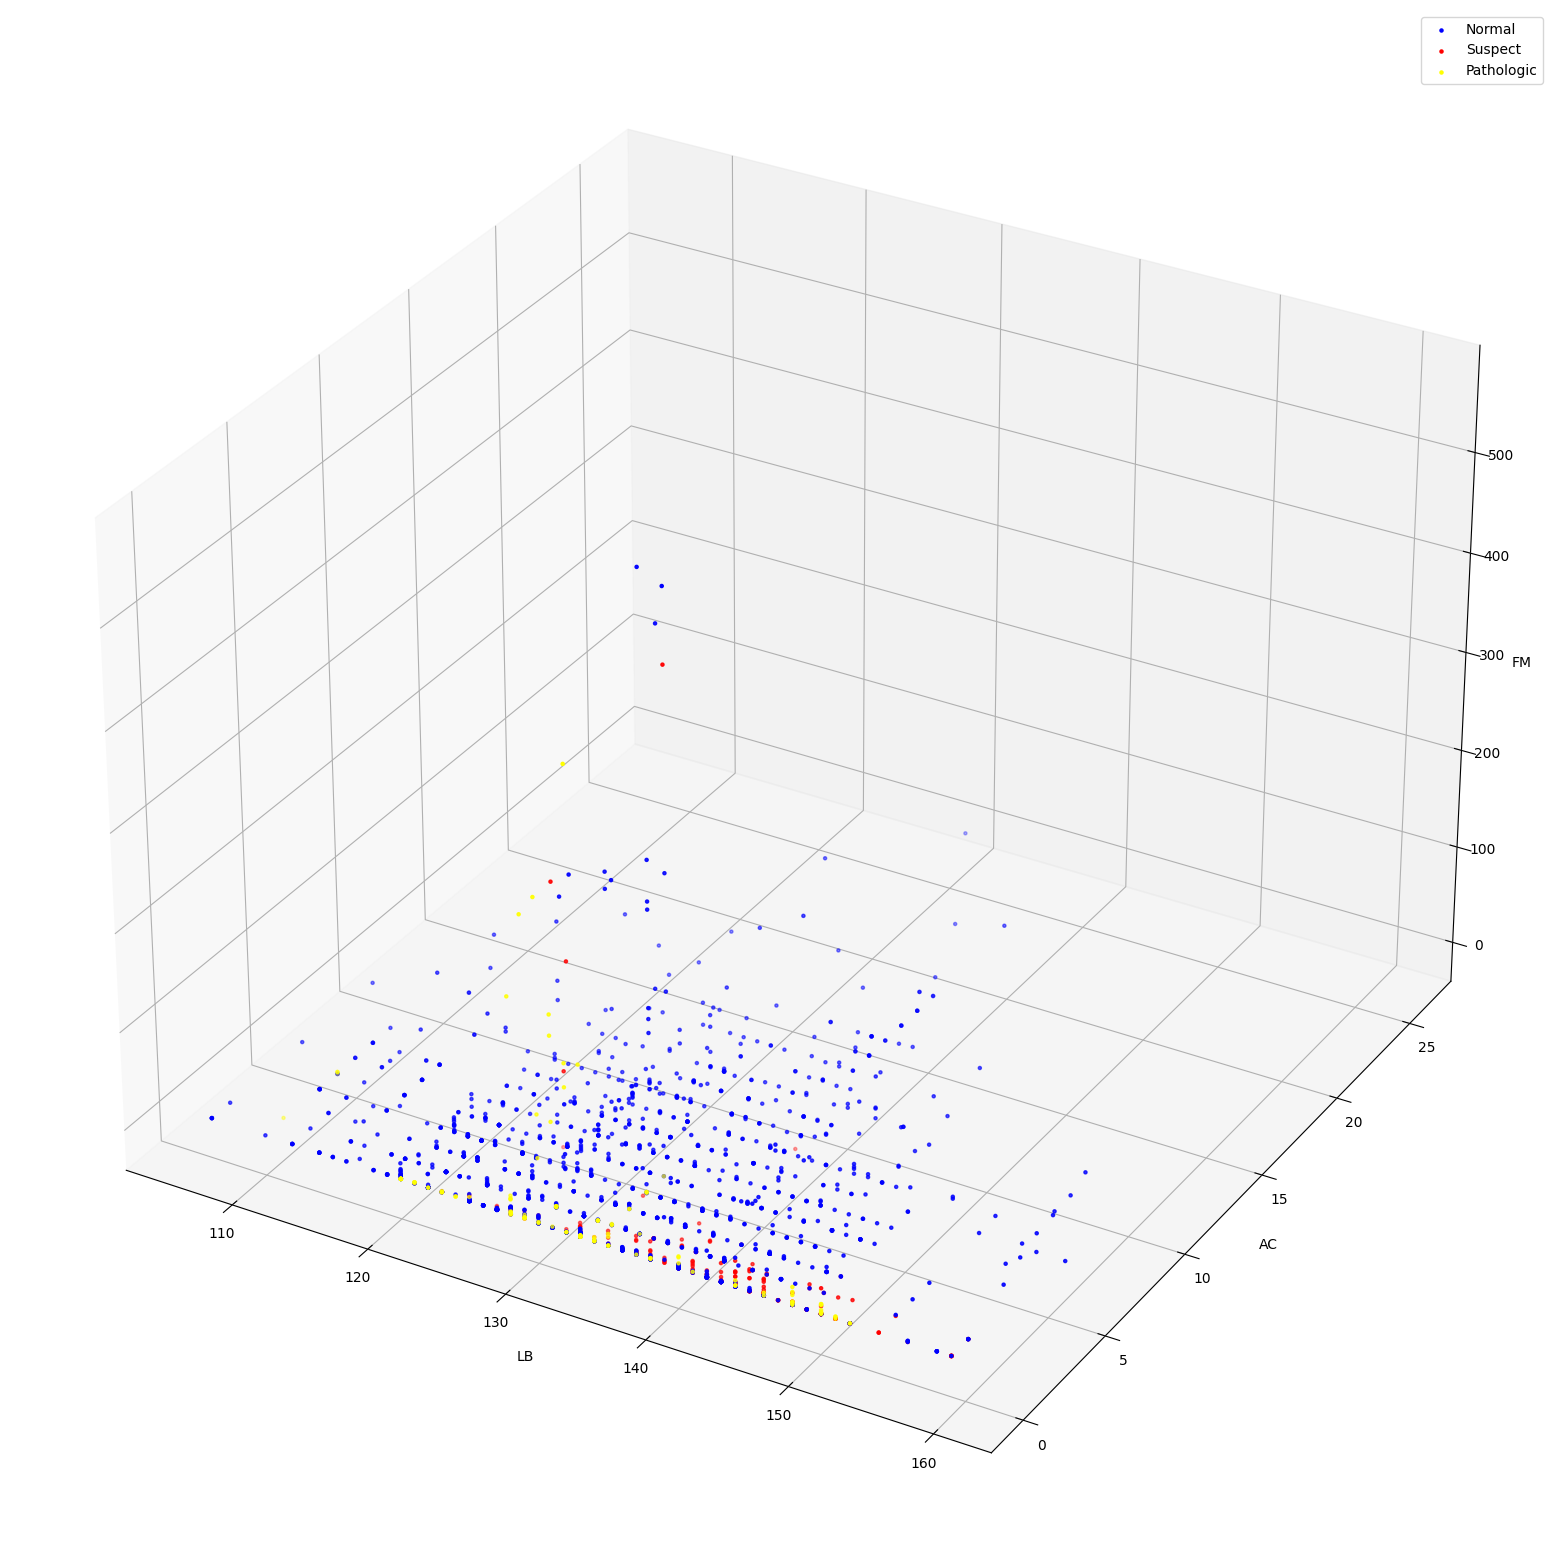

In [15]:
fig = plt.figure(figsize = (20.0,20.0))
ax= fig.add_subplot(111,projection ='3d')


cond = [(1,'Blue', 'Normal'),(2,'Red','Suspect'),(3,'Yellow', 'Pathologic')]

for x,color,action in cond:
    xs = rawData.loc[rawData['NSP'] == x]['LB']
    ys = rawData.loc[rawData['NSP'] == x]['AC']
    zs = rawData.loc[rawData['NSP'] == x]['FM']
    ax.scatter(xs, ys, zs, c=color, marker='.', label=action)

ax.legend()
ax.set_xlabel('LB')
ax.set_ylabel('AC')
ax.set_zlabel('FM')


plt.show()

#### The previous figure indicates that the higher the FM the higher the possibility that the result is Normal. It also indicates that the AC is the feature with the most effect on the result, as the lower it goes the more suspect and pathologic results appear.

## Splitting the DataFrame
### Splitting the DataFrame to X and Y

In [16]:
X = rawData.drop(['NSP', 'CLASS'], axis=1)
Y = rawData['NSP']

In [17]:
X.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Tendency,A,B,C,D,AD,DE,LD,FS,SUSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the X and Y to training and testing datasets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Classification Supervised Learning
<b>I will be using these three supervised models</b>
<li>Multiclass Classification
<li>K-Nearest Neighbour
<li>Logistic Regression

### Multiclass Classification

In [19]:
for i in range (2 , 11):
    treecf = DecisionTreeClassifier(max_depth=i, random_state=0)
    treecf.fit(X_train, y_train)
    y_pred = treecf.predict(X_test)
    acc_train = treecf.score(X_train,y_train)
    acc_test = treecf.score(X_test, y_test)
    print("max_depth:{}".format(i))
    print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
    print("---------------------------")

max_depth:2
Traing accuracy:0.917 
Testing accuracy:0.9294670846394985
---------------------------
max_depth:3
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:4
Traing accuracy:0.954 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:5
Traing accuracy:0.954 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:6
Traing accuracy:0.972 
Testing accuracy:0.9561128526645768
---------------------------
max_depth:7
Traing accuracy:0.985 
Testing accuracy:0.9670846394984326
---------------------------
max_depth:8
Traing accuracy:0.987 
Testing accuracy:0.9639498432601881
---------------------------
max_depth:9
Traing accuracy:0.990 
Testing accuracy:0.9702194357366771
---------------------------
max_depth:10
Traing accuracy:0.993 
Testing accuracy:0.9686520376175548
---------------------------


<b> best accuracy is when max_depth = 9 with testing accuracy of 0.97 </b>

In [20]:
treecf = DecisionTreeClassifier(max_depth=9, random_state=0)
treecf.fit(X_train, y_train)
y_pred = treecf.predict(X_test)

In [21]:
acc_train = treecf.score(X_train, y_train)
acc_test = treecf.score(X_test, y_test)
print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))

Traing accuracy:0.990 
Testing accuracy:0.9702194357366771


/home/zak/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


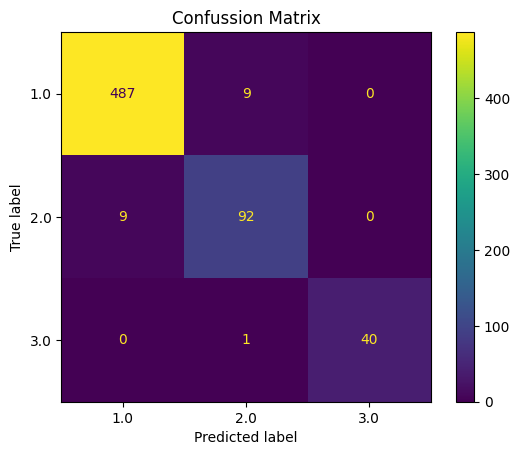

In [22]:
plot_confusion_matrix(treecf, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

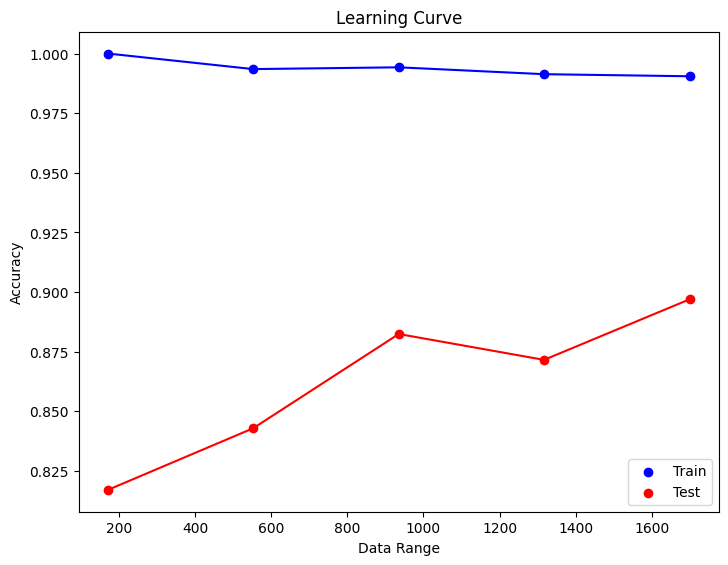

In [23]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(treecf, X, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

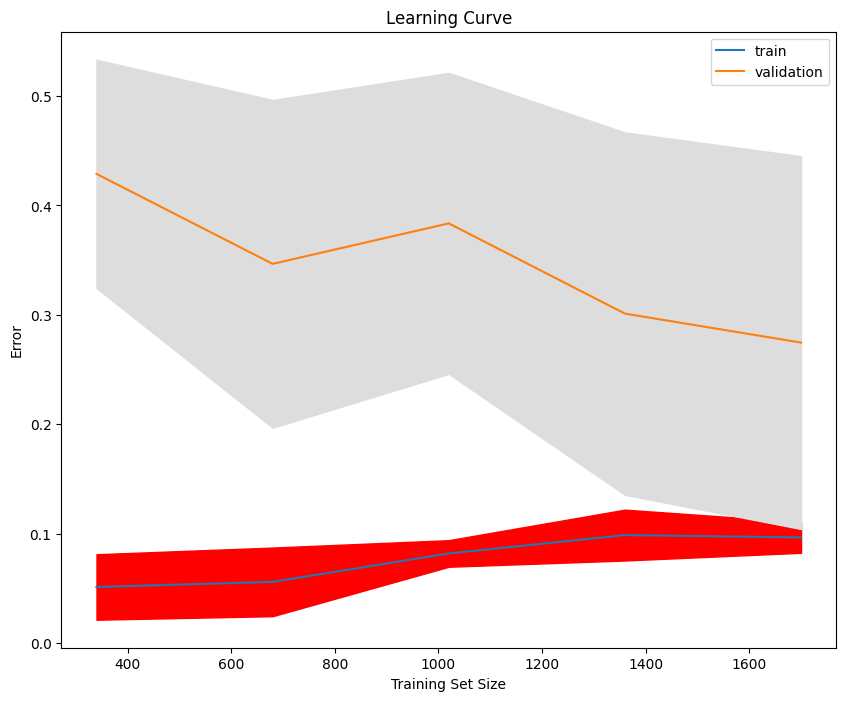

In [24]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=treecf,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [25]:
cf_rep = classification_report(y_test, y_pred,
                            target_names=["Normal", "Suspect", "Pathologic"])

print(cf_rep)

              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       496
     Suspect       0.90      0.91      0.91       101
  Pathologic       1.00      0.98      0.99        41

    accuracy                           0.97       638
   macro avg       0.96      0.96      0.96       638
weighted avg       0.97      0.97      0.97       638



#### Multiclass Classification testing accuracy is 0.97

### K-Nearest Neighbor

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [27]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

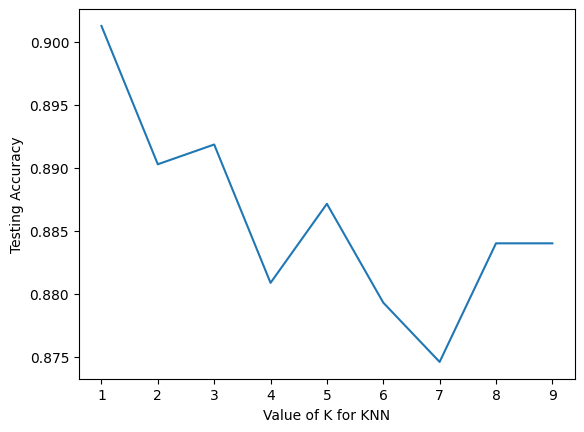

In [28]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

<b>K=1 has the best accuracy</b>

In [29]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [30]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.901


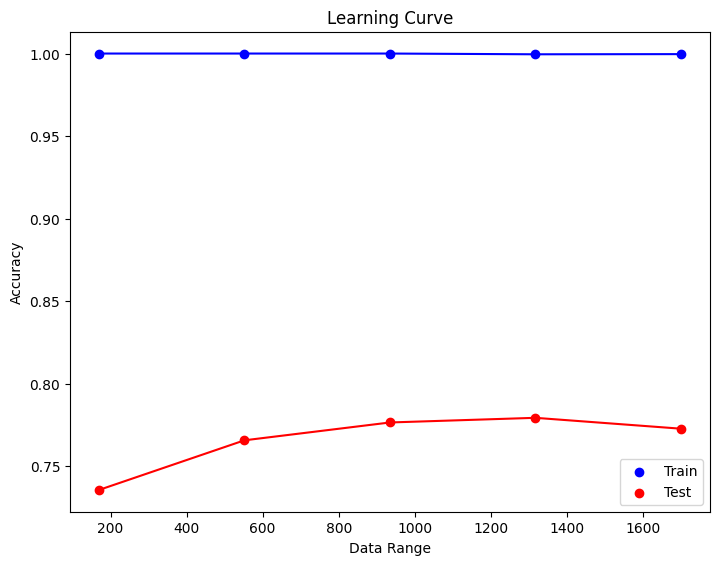

In [31]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(knn, X, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

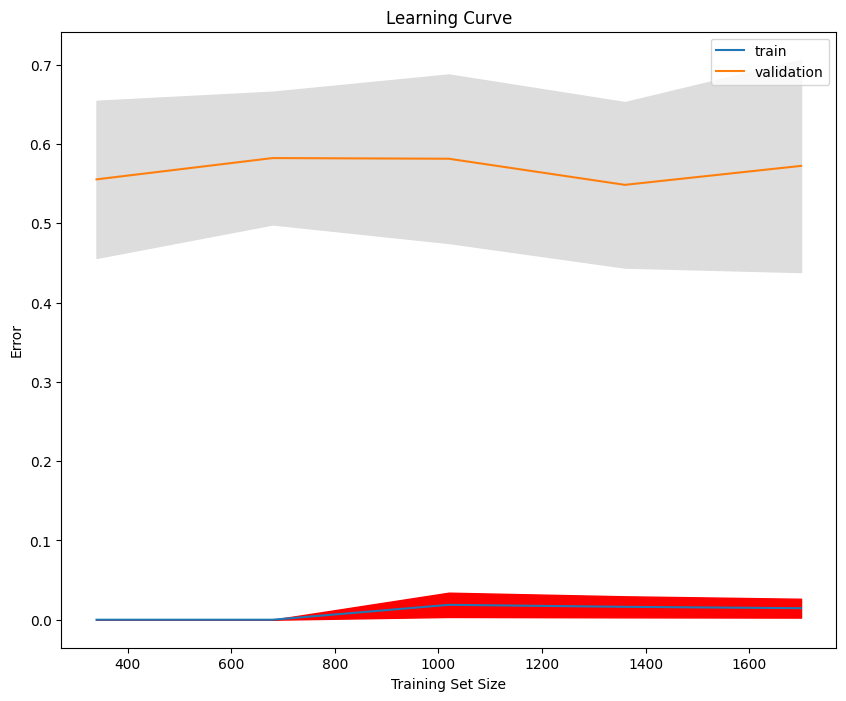

In [32]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [33]:
cf_rep = classification_report(y_test, y_pred,
                            target_names=["Normal", "Suspect", "Pathologic"])

print(cf_rep)

              precision    recall  f1-score   support

      Normal       0.91      0.96      0.93       496
     Suspect       0.73      0.57      0.64       101
  Pathologic       0.82      0.76      0.78        41

    accuracy                           0.88       638
   macro avg       0.82      0.76      0.79       638
weighted avg       0.88      0.88      0.88       638



#### K-Nearest Neighbour has 0.88 accuracy according to the classification report and 0.90 according to the score testing with a noticable underfitting to the data, which makes the Multiclass the better model yet.

### Logistic Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

/home/zak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9827586206896551, 0.9827586206896551, 0.9780564263322884, 0.9545454545454546, 0.9529780564263323]


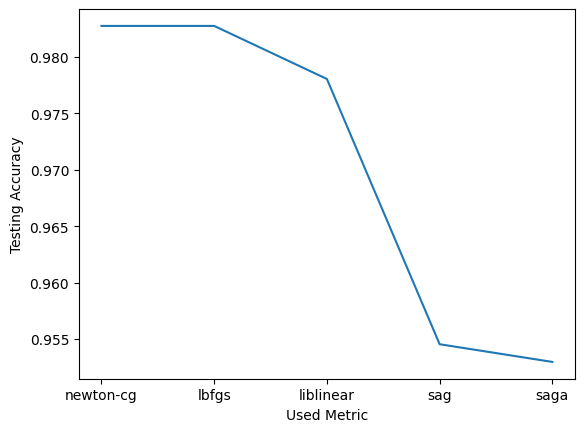

In [35]:
Sols = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for s in Sols:
    l = LogisticRegression(random_state=42,solver=s, max_iter=10000).fit(X_train, y_train)
    y_pred = l.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
  
print(scores)
plt.plot(Sols, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()

<b>newton-cg or lbfgs both have the best accuracy so i will use the default one, lbfgs</b>

In [36]:
lr = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)
lr.score(X_test, y_test)

/home/zak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9827586206896551

/home/zak/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


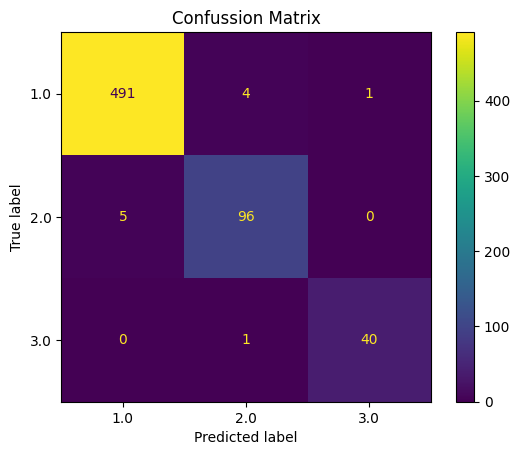

In [37]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

/home/zak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

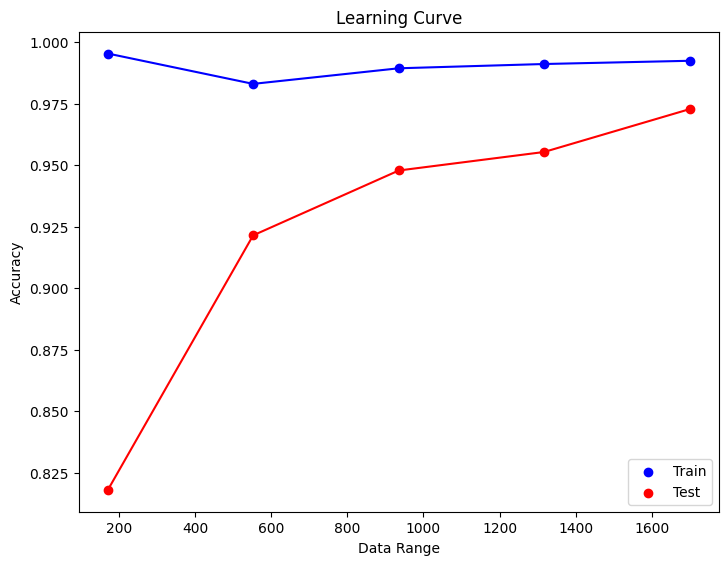

In [38]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, X, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

/home/zak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

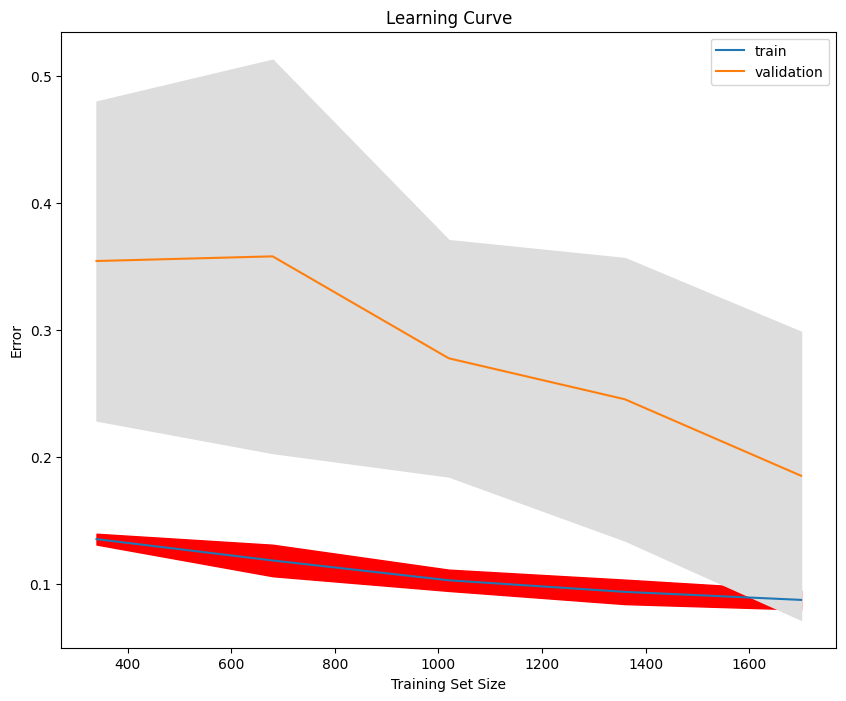

In [39]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [40]:
cf_rep = classification_report(y_test, y_pred,
                            target_names=["Normal", "Suspect", "Pathologic"])

print(cf_rep)

              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98       496
     Suspect       0.91      0.83      0.87       101
  Pathologic       0.88      0.85      0.86        41

    accuracy                           0.95       638
   macro avg       0.92      0.89      0.90       638
weighted avg       0.95      0.95      0.95       638



#### The Logestic Regression accuracy is 0.95 in the classification report, while 0.98 in the score testing which makes it close between the Multiclass model and the Logestic regression model. But Multiclass is better in training the more than the Logistic Regression

## Feature Selection Techniques
<b>I will try both Step Forward Feature Selection and Step Backward Feature Selection to find the best Feature Selesction Technique.</b>

### Step Forward Feature Selection

In [41]:
knn = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn, n_features_to_select=0.7)
sfs.fit(X_train, y_train)
sfs.get_support()

array([False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [42]:
sfs = SFS(KNeighborsClassifier(n_neighbors=4),
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2022-11-12 19:54:30] Features: 1/7 -- score: 0.862231182795699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished

[2022-11-12 19:54:31] Features: 2/7 -- score: 0.9173387096774194[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.7s finished

[2022-11-12 19:54:32] Features: 3/7 -- score: 0.9529569892473119[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.7s finished

[2022-11-12 19:54:33] Features: 4/7 -- score: 0.9529569

In [43]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
df

,feature_idx,avg_score
1,"(30,)",0.862231
2,"(28, 30)",0.917339
3,"(28, 29, 30)",0.952957
4,"(9, 28, 29, 30)",0.952957
5,"(9, 11, 28, 29, 30)",0.952957
6,"(9, 11, 21, 28, 29, 30)",0.952957
7,"(9, 11, 21, 22, 28, 29, 30)",0.952957


In [44]:
sfs.k_feature_names_

('LD', 'FS', 'SUSP')

In [45]:
sfs.k_feature_idx_

(28, 29, 30)

In [46]:
sfs.k_score_

0.9529569892473119

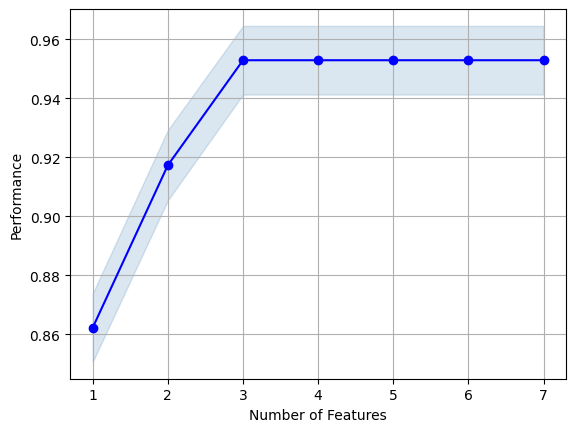

In [47]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()

### Step Backward Selection

In [48]:
sbs = SFS(KNeighborsClassifier(n_neighbors=4),
          k_features = (1, 7),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.9s finished

[2022-11-12 19:54:37] Features: 30/1 -- score: 0.8958333333333334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished

[2022-11-12 19:54:38] Features: 29/1 -- score: 0.8998655913978494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.8s finished

[2022-11-12 19:54:39] Features: 28/1 -- score: 0.9032258064516129[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s finished

[2022-11-12 19:54:39] Features: 27/1 -- score: 0.91

In [49]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
df

,feature_idx,avg_score
31,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.889785
30,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.895833
29,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.899866
28,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16...",0.903226
27,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 15, 16, 1...",0.911962
26,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 16, 17, 1...",0.913978
25,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 16, 17, 1...",0.915323
24,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 17, 18, 1...",0.915995
23,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 17, 18, 1...",0.915995
22,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 17, 18, 1...",0.915995


In [50]:
sbs.k_feature_names_

('LB', 'AC', 'UC', 'ASTV', 'Mean', 'FS', 'SUSP')

In [51]:
sbs.k_feature_idx_

(0, 1, 3, 4, 18, 29, 30)

In [52]:
sbs.k_score_

0.9146505376344086

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

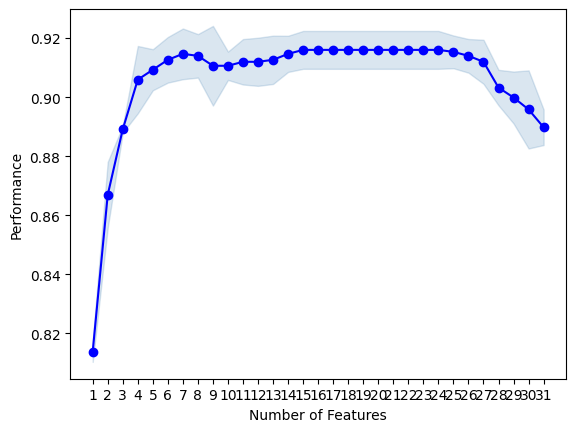

In [53]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')

### Step forward has better score than the Step backward with score of 0.95 while Step backward has an score of 0.91

### Extracting the selected features to use the model on them.

In [54]:
X_subset = X[['LD', 'FS', 'SUSP']]

In [55]:
X_subset.head()

,LD,FS,SUSP
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, Y, test_size=0.3, random_state=42)

## Classification Supervised Learning After Feasture Selection

<b>I will be using these three supervised models</b>
<li>Multiclass Classification
<li>K-Nearest Neighbour
<li>Logistic Regression

### Multiclass Classification

In [57]:
for i in range (2 , 11):
    treecf = DecisionTreeClassifier(max_depth=i, random_state=0)
    treecf.fit(X_train, y_train)
    y_pred = treecf.predict(X_test)
    acc_train = treecf.score(X_train,y_train)
    acc_test = treecf.score(X_test, y_test)
    print("max_depth:{}".format(i))
    print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
    print("---------------------------")

max_depth:2
Traing accuracy:0.917 
Testing accuracy:0.9294670846394985
---------------------------
max_depth:3
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:4
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:5
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:6
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:7
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:8
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:9
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------
max_depth:10
Traing accuracy:0.953 
Testing accuracy:0.9529780564263323
---------------------------


<b> best accuracy is when max_depth = 3 with testing accuracy of 0.95 </b>

In [58]:
treecf = DecisionTreeClassifier(max_depth=9, random_state=0)
treecf.fit(X_train, y_train)
y_pred = treecf.predict(X_test)

In [59]:
acc_train = treecf.score(X_train, y_train)
acc_test = treecf.score(X_test, y_test)
print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))

Traing accuracy:0.953 
Testing accuracy:0.9529780564263323


/home/zak/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


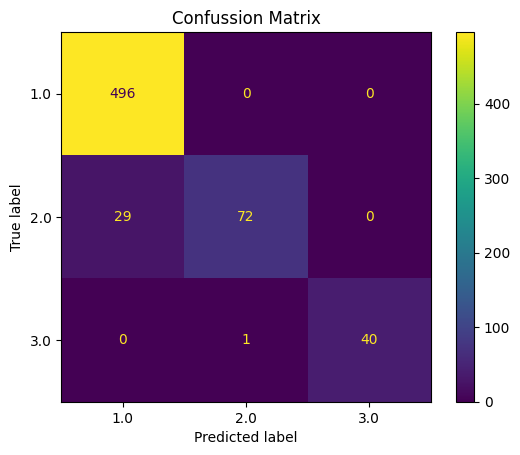

In [60]:
plot_confusion_matrix(treecf, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

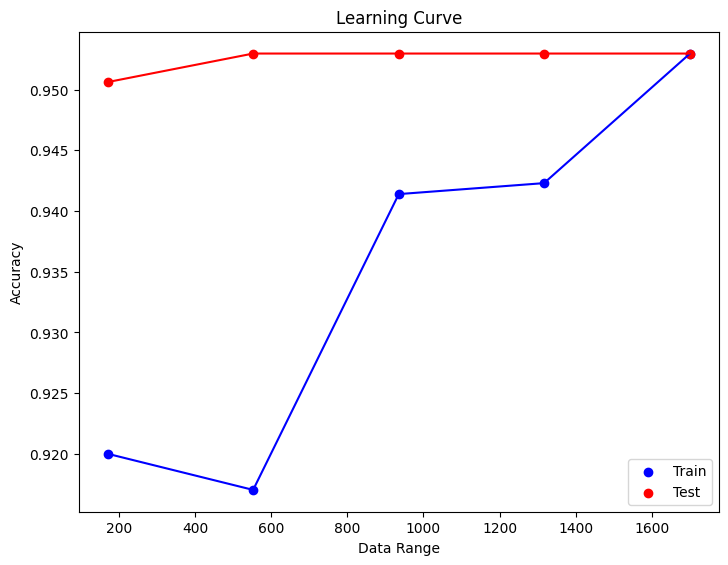

In [61]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(treecf, X_subset, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

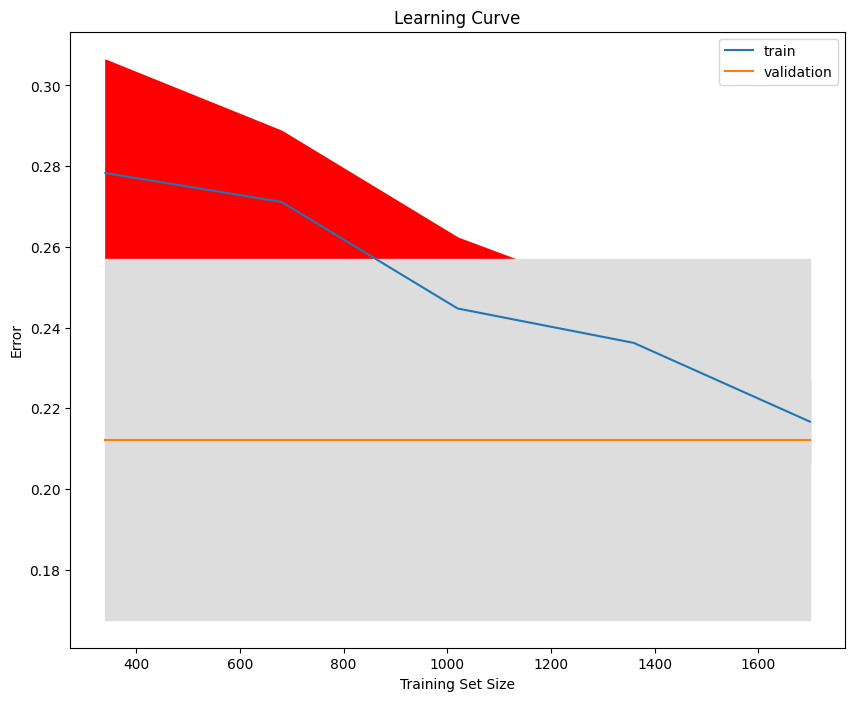

In [62]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=treecf,
    X=X_subset,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [63]:
cf_rep = classification_report(y_test, y_pred,
                            target_names=["Normal", "Suspect", "Pathologic"])

print(cf_rep)

              precision    recall  f1-score   support

      Normal       0.94      1.00      0.97       496
     Suspect       0.99      0.71      0.83       101
  Pathologic       1.00      0.98      0.99        41

    accuracy                           0.95       638
   macro avg       0.98      0.90      0.93       638
weighted avg       0.95      0.95      0.95       638



#### After the feature selection, the accuracy went from 0.97 to 0.95. While this is not a big difference, it is still lower than using the whole data.

### K-Nearest Neighbor

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, Y, test_size=0.3, random_state=42)

In [65]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

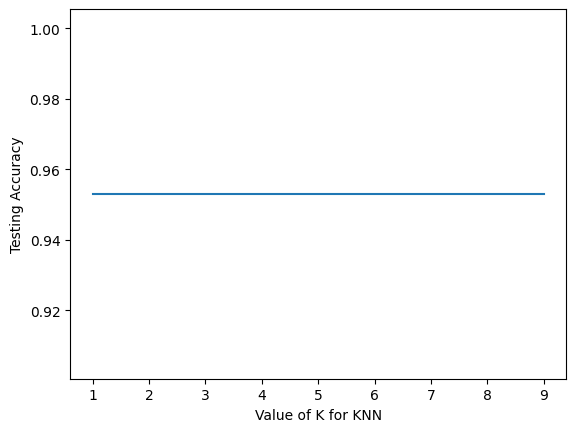

In [66]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

<b>They are all the same
</b>

In [67]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [68]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.953
Accuracy on test set: 0.953


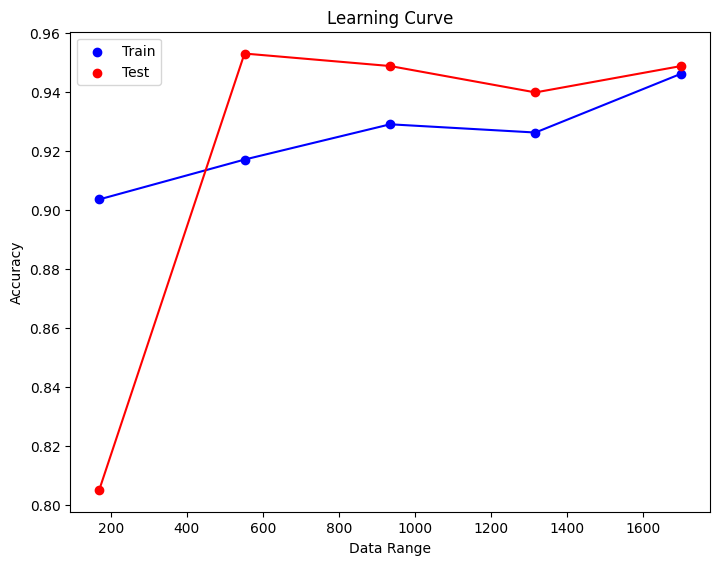

In [69]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(knn, X_subset, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

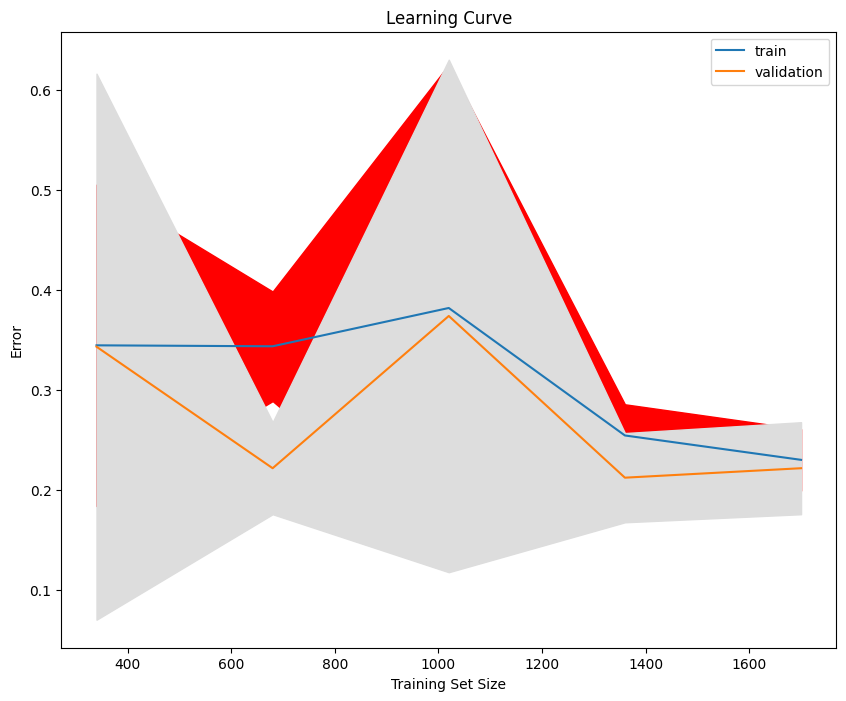

In [70]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X_subset,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [71]:
cf_rep = classification_report(y_test, y_pred,
                            target_names=["Normal", "Suspect", "Pathologic"])

print(cf_rep)

              precision    recall  f1-score   support

      Normal       0.94      1.00      0.97       496
     Suspect       0.99      0.71      0.83       101
  Pathologic       1.00      0.98      0.99        41

    accuracy                           0.95       638
   macro avg       0.98      0.90      0.93       638
weighted avg       0.95      0.95      0.95       638



#### K-Nearest Neighbour accuracy got better by 0.7 using the feature selection method than by using all the data. (from 0.88 to 0.95)

### Logistic Regression

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, Y, test_size=0.3, random_state=42)

[0.9529780564263323, 0.9529780564263323, 0.9529780564263323, 0.9529780564263323, 0.9529780564263323]


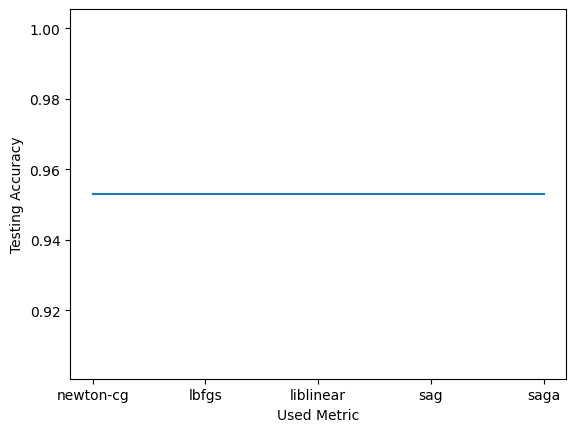

In [73]:
Sols = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for s in Sols:
    l = LogisticRegression(random_state=42,solver=s, max_iter=10000).fit(X_train, y_train)
    y_pred = l.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
  
print(scores)
plt.plot(Sols, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()

<b>They are all the same, again</b>

In [74]:
lr = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)
lr.score(X_test, y_test)

0.9529780564263323

/home/zak/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


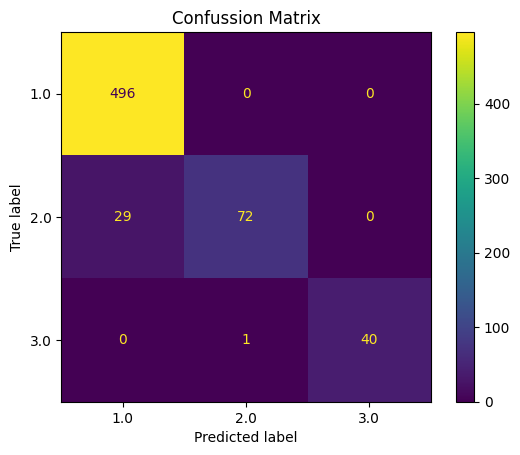

In [75]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

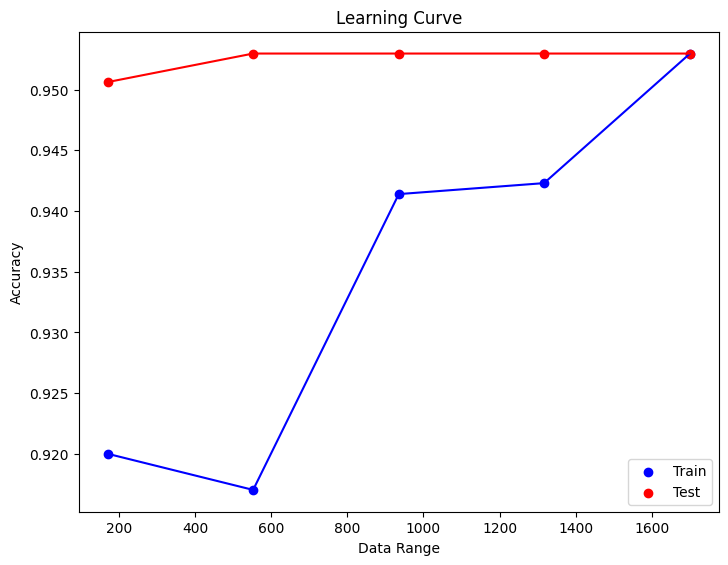

In [76]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, X_subset, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

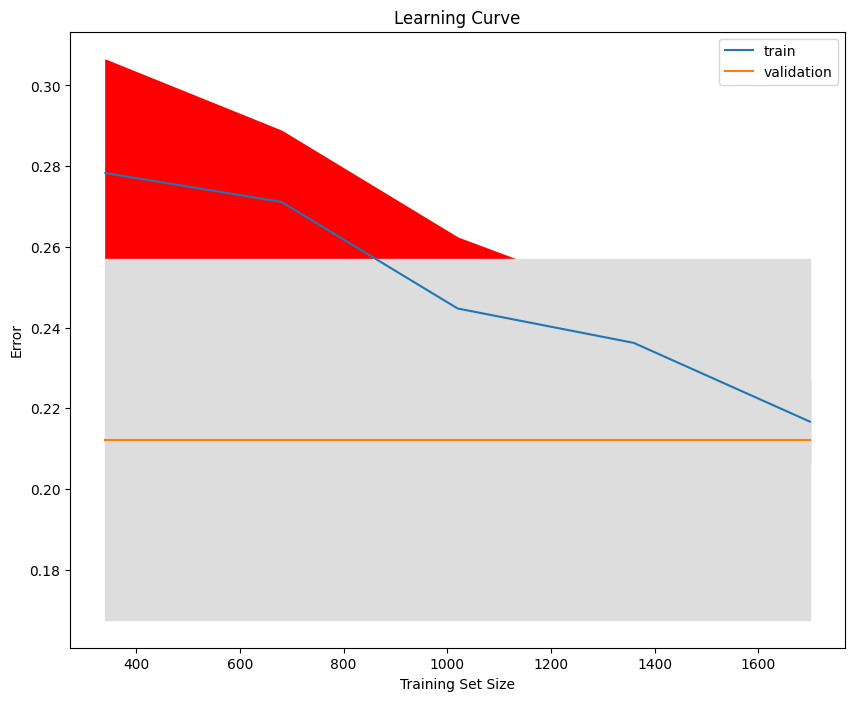

In [77]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr,
    X=X_subset,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [78]:
cf_rep = classification_report(y_test, y_pred,
                            target_names=["Normal", "Suspect", "Pathologic"])

print(cf_rep)

              precision    recall  f1-score   support

      Normal       0.94      1.00      0.97       496
     Suspect       0.99      0.71      0.83       101
  Pathologic       1.00      0.98      0.99        41

    accuracy                           0.95       638
   macro avg       0.98      0.90      0.93       638
weighted avg       0.95      0.95      0.95       638



#### The accuracy of the Logistic Regression did not improve after the feature selection, but the training dataset actually showed improvment on the graphs

# Conclusion
## Without using feature selection methods
### the best model accuracy was the Multiclass model followed by the Logistic Regression, although the Logistic regression seem to be more rounded than the Multiclass model
## Using the feature selection methods
### the KNN got better and improved with accuracy, while the multiclass that did not improve rather the accuracy got down, and the logistic regression stayed the same. But the logistic regression was the best model.